# 3_KVA_TRANSFORMER NOTEBOOK (unfinished)

### The purpose of this notebook is to act as a guide for computing & analyzing the single phase transformer using MATLAB or OCTAVE 
### Status: *in progress* 

# Contents

## 1. Transformer data
------------------------------------------------------------
------------------------------------------------------------
## 1.1 DC Resistance test
------------------------------------------------------------
------------------------------------------------------------
## 1.2 Magnetization characteristics
## 1.2.1 B-H Plot based on voltage-current data
## 1.2.2 Dynamic permeability plot
------------------------------------------------------------
------------------------------------------------------------
## 1.3 No load test 
## 1.3.1 Volt Amp Power waveforms @ rated voltage
## 1.3.2 Volt Amp Power waveforms ABOVE voltage (special case)
## 1.3.3 Exciting admittance
------------------------------------------------------------
------------------------------------------------------------
## 1.4 Short circuit test 
## 1.4.1 Volt Amp Power waveforms @ rated current
## 1.4.2 Short circuit impedance
------------------------------------------------------------
------------------------------------------------------------
## 2. Performance under load 

## 2.1 Resistive load test
## 2.1.1 Efficiency
## 2.1.2 Voltage regulation
------------------------------------------------------------
------------------------------------------------------------
## 2.2 Inductive load test
## 2.2.1 Efficiency
## 2.2.2 Voltage regulation
------------------------------------------------------------
------------------------------------------------------------
## 2.3 Capacitive load test
## 2.3.1 Efficiency
## 2.3.2 Voltage regulation
------------------------------------------------------------
------------------------------------------------------------
## 2.4 Maximum efficiency criterion

------------------------------------------------------------
------------------------------------------------------------
## 2.5 Sudden short circuit 
## 2.5.1 Rated voltage
## 2.5.2 Above rated voltage
------------------------------------------------------------
------------------------------------------------------------
### *Last update: april 3rd , 2020*



## 1. Transformer data

### The transformer used in this notebook is the tiny one found at the electrical machines department.

### The following specs are in its nameplate.

### - KVA RATING: 3KVA
### - LOW SIDE VOLTAGE: 110V RMS
### - HIGH SIDE VOLTAGE: 220V RMS

### This transformer could be used to STEP-UP the voltage to power 220V equipment ( *to power up from a hair dryer to a single phase variable frequency drive for example..* )

### -*Turns ratio (defined simply as a)*

## $$ a = \frac {V1}{V2} = \frac {110}{220} = .5  $$

### - Remember if:
### - a > 1  = Step - down (buck)
### - a < 1  = Step - up (boost)
### - a = 1  = 1:1 , Isolation


------------------------------------------------------------
------------------------------------------------------------


## 1.1 DC Resistance test

### This test is conducted to estimate the DC resistance value for each winding.

### Remember when applying AC current, the resistance value is higher due to *skin effect* 

### The test was done with:
### - DC current clamp meter (UNI-T  UT-210E)
### - Multimeter for DC voltage measurement ( ANENG AN8008 ) 
### - Switching DC-DC power supply with constant current limit at

### - 1 Amp
### - 2 Amps
### - 3 Amps 

### The resistance is computed for each stage and finally averaged.



### @ 1 AMP

In [4]:
% DC RESISTANCE TEST @ 1 AMP
dc_ix1=1.034; %DC CURRENT REFERENCE VALUE
dc_vx1=0.158; %DC VOLTAGE MEASURED VALUE
a1= dc_vx1/dc_ix1 % LOW SIDE DC RESISTANCE VALUE #1
dc_ih1=1.14; %DC CURRENT REFERENCE VALUE
dc_vh1=0.382; %DC VOLTAGE MEASURED VALUE
b1= dc_vh1/dc_ih1 %HIGH SIDE DC RESISTANCE VALUE

a1 =  0.15280
b1 =  0.33509


### @ 2 AMPS

In [5]:
% DC RESISTANCE TEST @ 2 AMP
dc_ix2=2.016; %DC CURRENT REFERENCE VALUE
dc_vx2=0.301; %DC VOLTAGE MEASURED VALUE
a2= dc_vx2/dc_ix2 % LOW SIDE DC RESISTANCE VALUE #2
dc_ih2=2.1; %DC CURRENT REFERENCE VALUE
dc_vh2=0.705; %DC VOLTAGE MEASURED VALUE
b2= dc_vh2/dc_ih2 %HIGH SIDE DC RESISTANCE VALUE

a2 =  0.14931
b2 =  0.33571


### @ 3 AMPS

In [6]:
% DC RESISTANCE TEST @ 3 AMP
dc_ix3=3.09; %DC CURRENT REFERENCE VALUE
dc_vx3=0.471; %dc volts
a3= dc_vx3/dc_ix3 % LOW SIDE DC RESISTANCE VALUE #3
dc_ih3=3.09; %DC CURRENT REFERENCE VALUE
dc_vh3=1.033; %DC VOLTAGE MEASURED VALUE
b3= dc_vh3/dc_ih3 %HIGH SIDE DC RESISTANCE VALUE

a3 =  0.15243
b3 =  0.33430


### Averaging all the values

In [7]:
% AVERAGE DC RESISTANCE VALUES
rx_dc= (a1+a2+a3)/3
rh_dc= (b1+b2+b3)/3
% MEASURED RESISTANCE VALUES WITH MULTIMETER ARE WAY OFF.

rx_dc =  0.15151
rh_dc =  0.33504


### The final values were

### --------------------------
### *Low voltage winding = 0.15151 Ohms*
### *High voltage winding = 0.33504 Ohms*
### --------------------------

### Later on we will check these values in the short circuit test

------------------------------------------------------------
------------------------------------------------------------



## 1.2 Magnetization characteristics

### This test is conducted to get the relationship between the voltage and the current 


### Since we know that *B Magnetic field* is related to the induced electromotive force (voltage)

### And the fact that *H Auxiliary field* is related to the current flow

### Then, if we plot voltage vs current we will get an approximate relationship to the actual B-H Curve

### The test was done with:
### - AC current clamp meter (UNI-T  UT-210E)
### - Multimeter for AC voltage measurement  (ANENG AN8008)
### - Single phase autotransformer

### The test was done on the LV side (110V rated)


### The test was pretty straight forward, just apply enough voltage in order to establish a relatively low current value and record those values.

### Keep incresing the current until you reach 20% above rated voltage




### The values were recorded in MS excel and saved as a .CSV file (Low_side_mag_curve.csv)




In [8]:
%MAGNETIZATION CURVE FROM LOW SIDE EXCITATION
%LOAD CSV DATA
csv1= fopen('Low_side_mag_curve.csv'); %Load CSV file
mag_data= textscan(csv1,'%f %f','Headerlines',1,'Delimiter',','); %Load data from mag_curve
i_H= mag_data{1,2}(:,1); %Data representing the H auxiliar field
v_B= mag_data{1,1}(:,1); %Data representing the B magnetic field
f=60; % Source frequency
w= 2*pi*f; % Source angular speed

## 1.2.1 B-H Plot based on voltage-current data

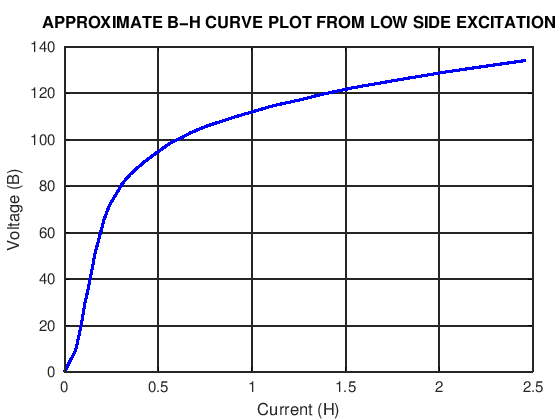

In [9]:
% APPROXIMATE B-H CURVE PLOT FROM LOW SIDE EXCITATION
plot(i_H,v_B,'b','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('APPROXIMATE B-H CURVE PLOT FROM LOW SIDE EXCITATION')
xlabel('Current (H)')
ylabel('Voltage (B)')

## 1.2.2 Dynamic permeability plot

### Remember that...
##  $$ Permeability  = \frac {B}{H}  $$

In [10]:
% PERMEABILITY FROM B-H DATA
perm_u= v_B./(i_H);

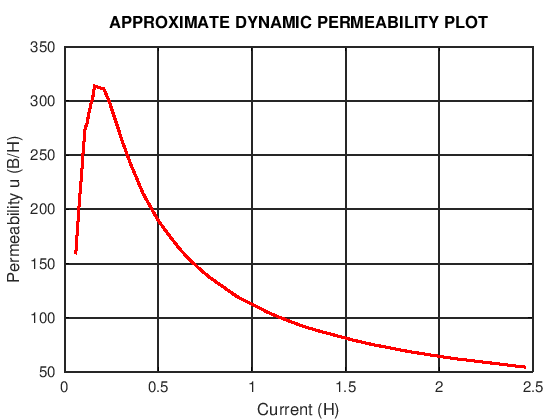

In [11]:
% APPROXIMATE DYNAMIC PERMEABILITY PLOT
plot(i_H,perm_u,'r','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('APPROXIMATE DYNAMIC PERMEABILITY PLOT')
xlabel('Current (H)')
ylabel('Permeability u (B/H)')

## 1.3 No load test

### This test is conducted to measure the *exciting current*  value in order to represent core phenomena (at no load condition)  into an equivalent circuit branch. Mainly, those phenomena are: 

### - Core magnetization ------>  its behaviour resembles ------>*linear inductor XL ( magnetizing reactance)*

### - Core losses (hysteresis + eddy) ------>  its behaviour resembles ------>*linear resistor RC ( core loss resistor)*


### The test was done on the LV side with the following equipment:

### - AC current clamp meter (UNI-T  UT-210E)
### - Multimeter for AC voltage measurement  (ANENG AN8008)
### - AC power clamp meter (MASTECH MS2208)
### - Oscilloscope (BK precision 2540B)
### - AC/DC current probe (Hantek CC-65)

------------------------------------------------------------
------------------------------------------------------------


## 1.3.1 Volt Amp Power waveforms @ rated voltage
### The following instantaneous voltage & current waveforms were acquired by the oscilloscope data acquisition setting (waveform saved as a CSV file)


In [12]:
%NO LOAD TEST FROM LOW SIDE AT RATED VOLTAGE 110V
%LOAD CSV DATA
t= linspace(-1,1,15000)';
csv2= fopen('Exciting_current_rated.csv'); % Load exciting current data at rated voltage
csv3= fopen('No_load_input_volt_rated.csv'); % Load no load input rated voltage

i_rated_data= textscan(csv2,'%f %f','Headerlines',2,'Delimiter',','); %Load current data
i_rated_nl= i_rated_data{1,2}(:,1); %Data representing the exciting current waveform

v_rated_data= textscan(csv3,'%f %f','Headerlines',2,'Delimiter',','); %Load voltage data
v_rated_nl= v_rated_data{1,2}(:,1); %Data representing the no load input rated voltage


## A) Input voltage waveform at LV side *(@ RATED VOLTAGE 110V )*

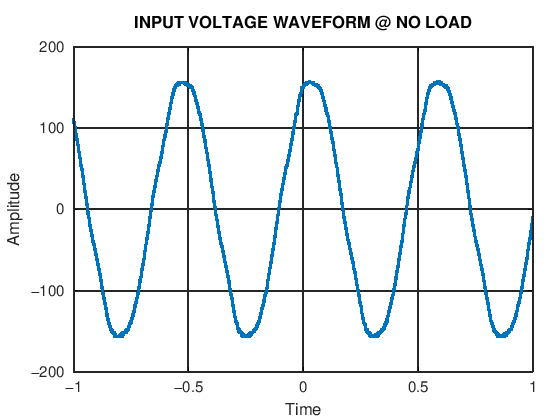

In [13]:
% NO LOAD INPUT RATED VOLTAGE PLOT
plot(t,v_rated_nl,'linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INPUT VOLTAGE WAVEFORM @ NO LOAD')
xlabel('Time')
ylabel('Amplitude')

## B) Exciting current waveform at LV side *(@ RATED VOLTAGE 110V )*

### *Notice the non-sinusoidal nature of the exciting current*



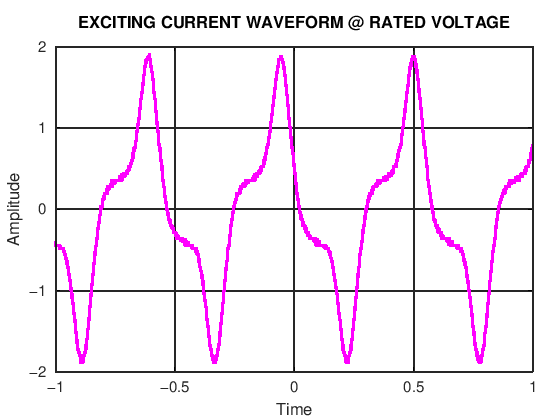

In [14]:
% EXCITING CURRENT PLOT AT RATED VOLTAGE
plot(t,i_rated_nl,'m','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('EXCITING CURRENT WAVEFORM @ RATED VOLTAGE')
xlabel('Time')
ylabel('Amplitude')

## C) Instantaneous power waveform at LV side *(@ RATED VOLTAGE 110V )*

In [15]:
%INSTANTANEOUS POWER AT NO LOAD
p_inst_rated= v_rated_nl.*i_rated_nl; 

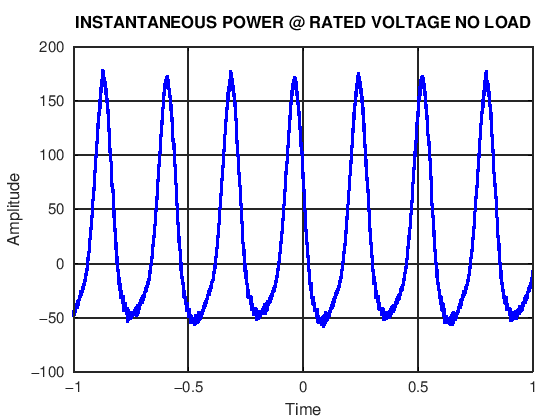

In [16]:
% INSTANTANEOUS POWER PLOT AT RATED VOLTAGE, NO LOAD
plot(t,p_inst_rated,'b','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INSTANTANEOUS POWER @ RATED VOLTAGE NO LOAD')
xlabel('Time')
ylabel('Amplitude')

## D) RMS & average power  *(@ RATED VOLTAGE 110V )*

### *Remember that the Root Mean Square value of a function is given by...*

## $$ RMS= \sqrt { \frac{1}{T} \int_{0}^T f(t)^2* dt } $$

### Where f(t) is our data arrangement (either voltage or current ; instantaneous values)


In [17]:
% RMS VOLTAGE AND CURRENT CALCULATIONS @ RATED INPUT
V_rated_rms= EC_rms(v_rated_nl) % INPUT VOLTAGE RMS VALUE
I_rated_rms= EC_rms(i_rated_nl) % INPUT CURRENT RMS VALUE

V_rated_rms =  111.55
I_rated_rms =  0.93461


In [18]:
% AVERAGE LOSSES @ RATED INPUT
p_rated= mean(p_inst_rated) % INPUT AVERAGE POWER VALUE

p_rated =  23.184


### A) *from CSV files*
### --------------------------
### -RMS Voltage = 111.55 volts
### -RMS current = 0.93461 amps
### -Average power = 23.184 watts
### --------------------------

------------------------------------------------------------
------------------------------------------------------------

### B) *by measuring*
### --------------------------
### -RMS Voltage = 110.23 volts
### -RMS current = 0.81 amps
### -Average power = 17 watts
### --------------------------

### *This showcases the value of measuring with a high quality TRUE-RMS meter*

### We´re gonna stick with the values from the CSV files. They are more reliable since the oscilloscope takes way more samples than a simple & cheap multimeter

------------------------------------------------------------
------------------------------------------------------------

## 1.3.2 Volt Amp Power waveforms ABOVE rated voltage

### Altough it seems like something useless, the idea behind is to illustrate the concept of *core saturation* and the consequences of applying voltage ABOVE the rated operating voltage

### Remember the previous permeability plot? As the current increases, the permeability goes down...

### *Permeability decreases -----> Inductance decreases -----> Current increases -----> Core loss increases*

### The following instantaneous voltage & current waveforms were acquired by the oscilloscope data acquisition setting (waveform saved as a CSV file)




In [19]:
%NO LOAD TEST FROM LOW SIDE AT MAINS VOLTAGE 135V
%LOAD CSV DATA
csv4= fopen('Exciting_current_mains.csv'); % Load exciting current data at mains voltage
csv5= fopen('No_load_input_volt_mains.csv'); % Load no load input mains voltage data

i_mains_data= textscan(csv4,'%f %f','Headerlines',2,'Delimiter',','); %Load current data
i_mains_nl= i_mains_data{1,2}(:,1); %Data representing the exciting current waveform 

v_mains_data= textscan(csv5,'%f %f','Headerlines',2,'Delimiter',','); %Load voltage data
v_mains_nl= v_mains_data{1,2}(:,1); %Data representing the no load input mains voltage

## A) Input voltage waveform at LV side *(@ ABOVE RATED VOLTAGE )*

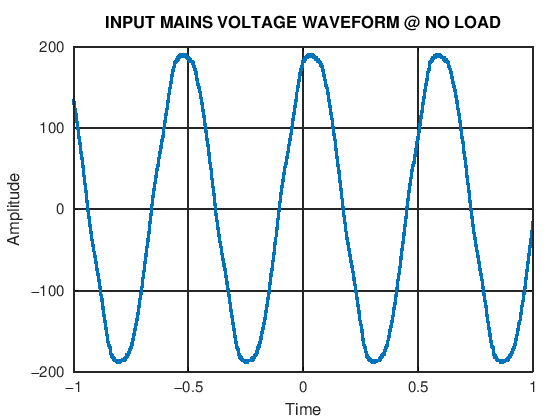

In [20]:
% NO LOAD INPUT MAINS VOLTAGE PLOT
plot(t,v_mains_nl,'linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INPUT MAINS VOLTAGE WAVEFORM @ NO LOAD')
xlabel('Time')
ylabel('Amplitude')

## B) Exciting current waveform at LV side *(@ ABOVE RATED VOLTAGE )*

### *Notice the increase in the exciting current plot*

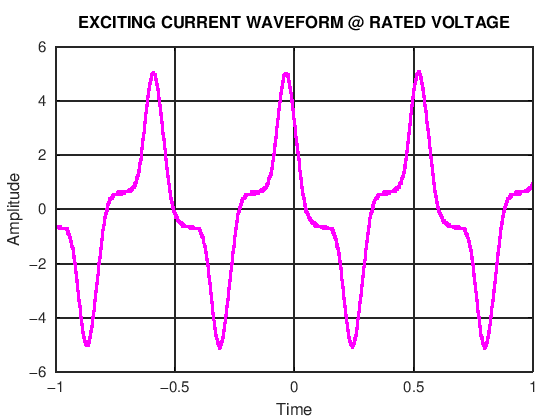

In [21]:
% EXCITING CURRENT PLOT AT MAINS VOLTAGE
plot(t,i_mains_nl,'m','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('EXCITING CURRENT WAVEFORM @ RATED VOLTAGE')
xlabel('Time')
ylabel('Amplitude')

## C) Instantaneous power waveform at LV side *(@ ABOVE RATED VOLTAGE )*

In [22]:
%INSTANTANEOUS POWER AT NO LOAD MAINS EXCITATION
p_inst_mains= v_mains_nl.*i_mains_nl; 

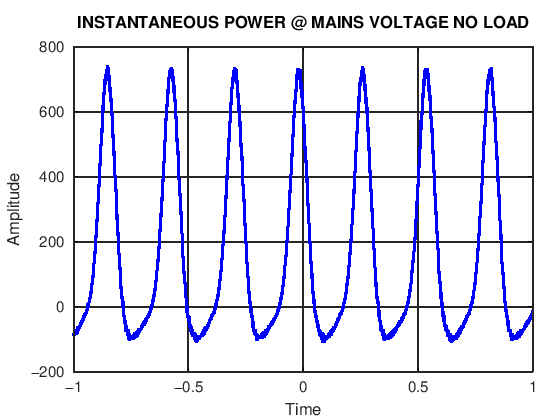

In [23]:
% INSTANTANEOUS POWER PLOT AT MAINS VOLTAGE, NO LOAD
plot(t,p_inst_mains,'b','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INSTANTANEOUS POWER @ MAINS VOLTAGE NO LOAD')
xlabel('Time')
ylabel('Amplitude')

## D) RMS & average power  *(@ ABOVE RATED VOLTAGE )*

### *Remember that the Root Mean Square value of a function is given by...*

## $$ RMS= \sqrt { \frac{1}{T} \int_{0}^T f(t)^2* dt } $$

### Where f(t) is our data arrangement (either voltage or current ; instantaneous values)

### *Notice the huge increase in the power at no load condition! Just by applying 25 Volts above the rated voltage value.*

In [24]:
% RMS VOLTAGE AND CURRENT CALCULATIONS @ MAINS INPUT 135V
V_mains_rms= EC_rms(v_mains_nl)
I_mains_rms= EC_rms(i_mains_nl)

V_mains_rms =  135.07
I_mains_rms =  2.4492


In [25]:
% AVERAGE LOSSES @ MAINS INPUT
p_mains= mean(p_inst_mains)

p_mains =  162.88



### A) *At rated voltage*
### --------------------------
### -RMS Voltage = 111.55 volts
### -RMS current = 0.93461 amps
### -Average power = 23.184 watts
### --------------------------

------------------------------------------------------------
------------------------------------------------------------
### B) *Above rated voltage*
### --------------------------
### -RMS Voltage = 135.07 volts
### -RMS current =2.4492 amps
### -Average power = 162.88 watts
### --------------------------

------------------------------------------------------------
------------------------------------------------------------

### *This showcases the risk of powering the transformer above its rated voltage*

### Notice that increasing the voltage up to %18.5 above rated voltage causes:

### - Current increase by almost 3 TIMES

### - Power increase by 7 TIMES
------------------------------------------------------------
------------------------------------------------------------



## 1.3.3 Exciting admittance

### Remember why we picked the admittance to represent core phenomena?

### - *An impedance implies the same current, different voltages for a resistance - reactance arrangement.*

### - *An admittance implies the same voltage, different currents for a resistance - reactance arrangement.*

### Maybe it is not so clear, but remember that 

### $$Iexc = Im + Ic$$

###  *Where:*
### - *Im = Magnetizing current component (current through XM)*
### - *Ic  = Core loss current component (current through RC)*

### An arrangement in which there is the same voltage across the elements but different currents, its called ADMITTANCE

### The calculation is pretty straightforward

## $$RC = \frac { V^2} {P} $$
## $$XM = \frac {V^2} {Q} $$


###  *Where:*
### - *V = RMS rated voltage*
### - *P  = Average power in watts*
### - *Q = Reactive power in vars*



In [26]:
% EQUIVALENT CIRCUIT PARAMETER CALCULATIONS @ RATED VALUES
%LOW SIDE EXCITING ADMITTANCE
Rc= ((V_rated_rms)^2)/p_rated
S_rated_nl= V_rated_rms*I_rated_rms;
Q_rated_nl= sqrt((S_rated_nl^2)-(p_rated^2));
Xm= ((V_rated_rms)^2)/Q_rated_nl

Rc =  536.77
Xm =  122.42


### What would happen if we use values ABOVE rated voltage?

In [27]:
% EQUIVALENT CIRCUIT PARAMETER CALCULATIONS @ RATED VALUES
%LOW SIDE EXCITING ADMITTANCE
Rc_ov= ((V_mains_rms)^2)/p_mains
S_rated_nl_ov= V_mains_rms*I_mains_rms;
Q_rated_nl_ov= sqrt((S_rated_nl_ov^2)-(p_mains^2));
Xm_ov= ((V_mains_rms)^2)/Q_rated_nl_ov

Rc_ov =  112.01
Xm_ov =  63.363


### A) @ rated voltage 
### --------------------------
### RC = 536.77 ohms
### XM = 122.42 ohms
### --------------------------
------------------------------------------------------------
------------------------------------------------------------

### B) @ ABOVE rated voltage 
### --------------------------
### RC = 112.01 ohms
### XM = 63.363 ohms
### --------------------------

### Notice two key points:

### A ) XM value decreased, since:
## $$ XM = \omega * Lm = 2*\pi*f * Lm $$ 
### Then we can clearly see that CORE SATURATION causes a *decrease in the magnetizing inductance LM value.*
### A decrease in the inductance means a decrease in the reactance, which also *means an INCREASE in the current through it.*
### --------------------------
### B ) RC value decreased
### Since CORE SATURATION causes a *decrease in the magnetizing inductance value* and thus an INCREASE in the current through it.
### *An INCREASE in the current means higher power losses in the core,* since:
## $$ P = \frac{V^2}{R} $$
### If V is keep constant, in order to increase P the R value must decrease.


------------------------------------------------------------
------------------------------------------------------------

In [28]:
% LOAD SHORT CIRCUIT TEST DATA
%LOAD CSV DATA
csv6= fopen('High_side_sc_amps.csv'); % Load short circuit current on high side
csv7= fopen('High_side_sc_volts.csv'); % Load short circuit voltage on high side

i_sc_data= textscan(csv7,'%f %f','Headerlines',2,'Delimiter',','); %Load current data
i_sc= i_sc_data{1,2}(:,1); %Data representing the short circuit current waveform 

v_sc_data= textscan(csv6,'%f %f','Headerlines',2,'Delimiter',','); %Load voltage data
v_sc= v_sc_data{1,2}(:,1); %Data representing the short circuit voltage


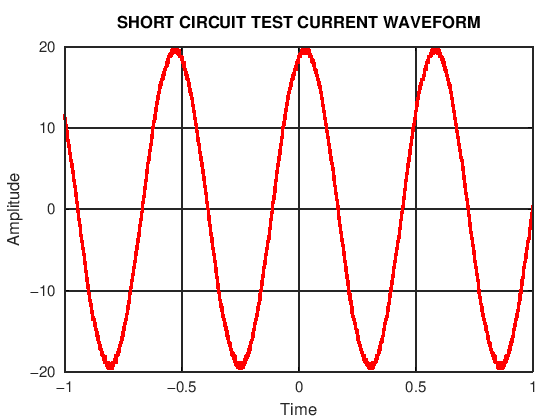

In [29]:
% SHORT CIRCUIT TEST CURRENT PLOT 
plot(t,i_sc,'r','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('SHORT CIRCUIT TEST CURRENT WAVEFORM')
xlabel('Time')
ylabel('Amplitude')

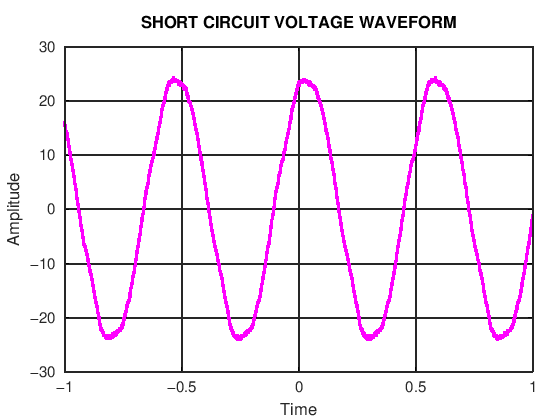

In [43]:
% SHORT CIRCUIT VOLTAGE PLOT 
plot(t,v_sc,'m','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('SHORT CIRCUIT VOLTAGE WAVEFORM')
xlabel('Time')
ylabel('Amplitude')

In [44]:
%INSTANTANEOUS POWER AT SHORT CIRCUIT
p_inst_sc= v_sc.*i_sc; 

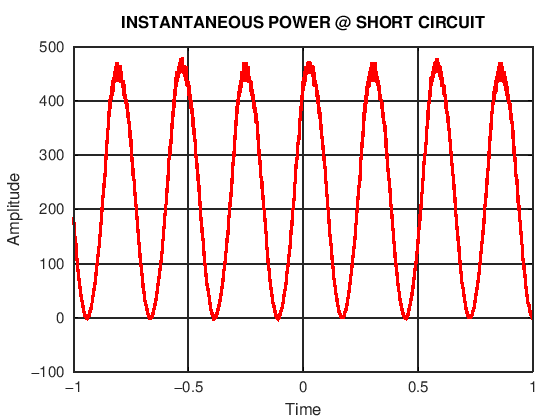

In [45]:
% INSTANTANEOUS POWER PLOT AT SHORT CIRCUIT
plot(t,p_inst_sc,'r','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INSTANTANEOUS POWER @ SHORT CIRCUIT')
xlabel('Time')
ylabel('Amplitude')

In [33]:
% RMS VOLTAGE AND CURRENT CALCULATIONS @ SHORT CIRCUIT
V_sc_rms= EC_rms(v_sc)
I_sc_rms= EC_rms(i_sc)

V_sc_rms =  16.865
I_sc_rms =  13.526


In [34]:
% AVERAGE LOSSES @ SHORT CIRCUIT
p_sc= mean(p_inst_sc)

p_sc =  227.08


In [35]:
% EQUIVALENT CIRCUIT PARAMETER CALCULATIONS @ RATED VALUES
%HIGH SIDE SHORT CIRCUIT IMPEDANCE
Zsc= V_sc_rms/I_sc_rms;
S_sc= V_sc_rms*I_sc_rms;
Pf_sc= p_sc/S_sc;
angle_sc= acosd(Pf_sc);
R_sc= Zsc*cosd(angle_sc)
X_sc= Zsc*sind(angle_sc)

R_sc =  1.2412
X_sc =  0.11868


In [36]:
% EQUIVALENT CIRCUIT PARAMETER CALCULATIONS @ RATED VALUES
%LEAKAGE IMPEDANCES ON HIGH SIDE
X_h= X_sc/2
R_h= R_sc/2


X_h =  0.059340
R_h =  0.62061


In [37]:
% EQUIVALENT CIRCUIT PARAMETER CALCULATIONS @ RATED VALUES
%LEAKAGE IMPEDANCES ON lOW SIDE
Vs=220;
Vp=110;
a=220/110;
X_x= X_h/(a^2)
R_x= R_h/(a^2)


X_x =  0.014835
R_x =  0.15515


In [38]:
% TEST #1 COMPUTING EXCITING CURRENT VALUE FROM A SINUSOIDAL RATED EXCITATION ON LOW SIDE
V_t= 155.6*sin(w*t);
v_test= EC_rms(V_t)

v_test =  110.02


In [39]:
%EQUIVALENT MAG IMPEDANCE
z1=complex(R_x,X_x);
za=complex(Rc,0);
zb=complex(Xm,0);
zm=(za*zb)/(za+zb);
zt= zm+z1;
i_test= v_test/zt;
i_test_a= abs(i_test)

i_test_a =  1.1020
